# Analyse Exploratoire

### Import des modules

In [3298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [3299]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3300]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3301]:
building_consumption.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Les deux variables cibles à prédire :

SiteEnergyUseWN(kBtu) = consommation totale d’énergie indépendamment de la météo

TotalGHGEmissions = émissions totales de gaz à effet de serre (en tonnes de CO₂)

In [3302]:
# On vérifie qu'on a bien uniquement l'année 2016 dans les données
building_consumption['DataYear'].unique()

array([2016])

In [3303]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Comme le précise le cahier des charges, le projet porte exclusivement sur les bâtiments non résidentiels.

Nous allons donc filtré la colonne BuildingType pour ne garder que : 
    'NonResidential',
    'Nonresidential COS',
    'Nonresidential WA',
    'SPS-District K-12',
    'Campus'

In [3304]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Plusieurs colonnes du jeu de données présentaient un taux de valeurs manquantes supérieur à 80 %.
Ces variables (Comments, Outlier, YearsENERGYSTARCertified, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA) seront donc supprimées, car elles ne contiennent pas suffisamment d’informations exploitables pour l’analyse ou la modélisation.

Les autres colonnes partiellement incomplètes ont été conservées pour traitement ultérieur, car elles apportent des informations potentiellement pertinentes (ex. ENERGYSTARScore, SecondLargestPropertyUseType, etc.).

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

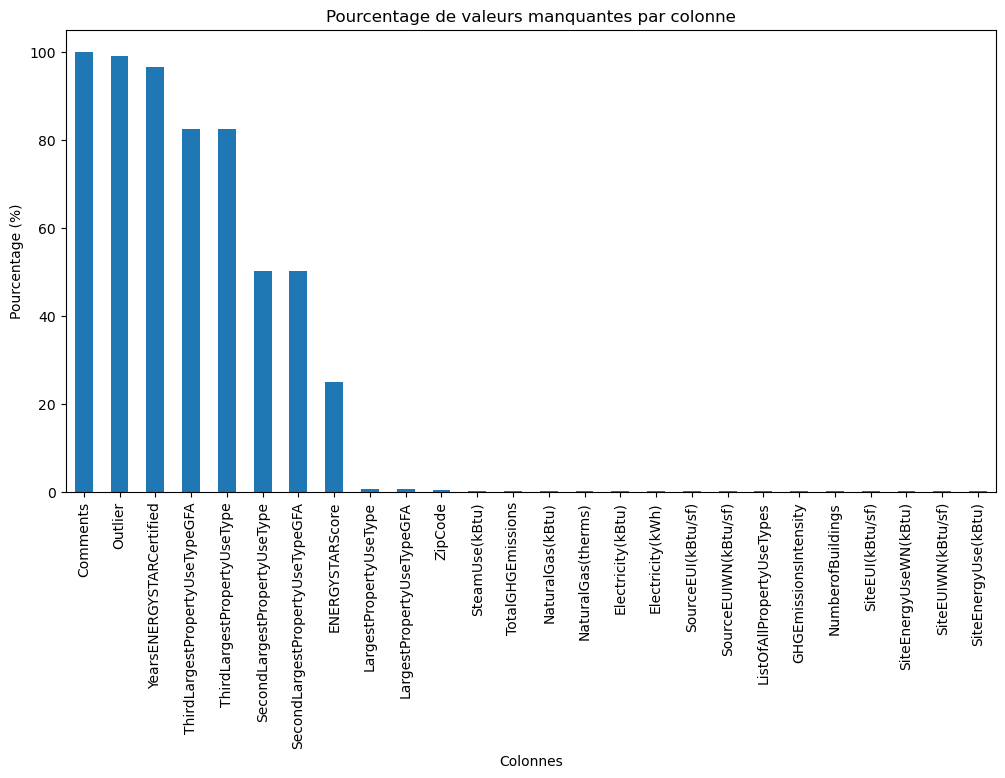

In [3305]:
# On regarde le pourcentage de valeurs manquantes par colonne
missing_percentage = building_consumption.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Colonnes')
plt.show()

Comme dit dans l'analyse exploratoire, nous allons supprimer certaines colonnes car trop de valeurs manquantes

In [3306]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'Comments',
    'YearsENERGYSTARCertified',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA'
]
building_consumption.drop(columns=cols_to_drop, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 46
Nombre de colonnes après suppression : 42


Maintenant on garde uniquement les structures non résidentiels pour être en accord avec le cahier des charges de la ville

In [3307]:
print('Nombre de lignes avant filtrage :', building_consumption.shape[0])
to_keep = [
    'NonResidential',         # Bâtiments purement non résidentiels (ceux visés par le projet)
    'Nonresidential COS',     # Bâtiments municipaux non résidentiels appartenant à la City of Seattle
    'Nonresidential WA',      # Bâtiments non résidentiels de l'État de Washington
    'SPS-District K-12',      # Écoles publiques (Seattle Public Schools), incluses car non résidentielles
    'Campus'                  # Ensembles de bâtiments à usage collectif (universités, hôpitaux, etc.)
]
building_consumption = building_consumption[building_consumption['BuildingType'].isin(to_keep)]
print('Nombre de lignes après filtrage :', building_consumption.shape[0])


Nombre de lignes avant filtrage : 3376
Nombre de lignes après filtrage : 1668


In [3308]:
# Ici on va voir tous les types d’usage rencontrés dans les Campus
campus_df = building_consumption[building_consumption["BuildingType"].str.lower() == "campus"]

campus_property_types = campus_df["ListOfAllPropertyUseTypes"]

campus_property_types = campus_property_types.dropna()

unique_types = (
    campus_property_types
    .str.split(",")              
    .explode()                   
    .str.strip()                 
    .dropna()
    .unique()
)

print("\nTous les types d’usage rencontrés dans les Campus :")
print(sorted(unique_types))



Tous les types d’usage rencontrés dans les Campus :
['Adult Education', 'Bar/Nightclub', 'College/University', 'Data Center', 'Energy/Power Station', 'Food Sales', 'K-12 School', 'Laboratory', 'Manufacturing/Industrial Plant', 'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other', 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility', 'Parking', 'Pre-school/Daycare', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall', 'Supermarket/Grocery Store']


In [3309]:
# On remarque que certaines lignes contiennent "Multifamily Housing"
print(f"\nNombre de lignes avant suppression des résidentielles : {len(building_consumption)}")
mask_residential = building_consumption["ListOfAllPropertyUseTypes"].str.contains("Multifamily Housing", case=False, na=False)
print(f"Nombre de lignes résidentielles détectées : {mask_residential.sum()}")

building_consumption = building_consumption[~mask_residential].copy()

print(f"après suppression : {len(building_consumption)}")



Nombre de lignes avant suppression des résidentielles : 1668
Nombre de lignes résidentielles détectées : 39
après suppression : 1629


In [3310]:
# Suppression des colonnes qui n'ont qu'une seul valeur unique
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
print('Toutes les colonnes avec une seule valeur unique avec leurs valeurs :')
for col in cols_single_value:
    print(f" - {col} : {building_consumption[col].iloc[0]}")
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
building_consumption.drop(columns=cols_single_value, inplace=True)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Toutes les colonnes avec une seule valeur unique avec leurs valeurs :
 - DataYear : 2016
 - City : Seattle
 - State : WA
Nombre de colonnes avant suppression : 42
Nombre de colonnes après suppression : 39


In [3311]:
print('Nombre de lignes après filtrage :', building_consumption.shape[0])
print('Nombre de colonnes après filtrage :', building_consumption.shape[1])

Nombre de lignes après filtrage : 1629
Nombre de colonnes après filtrage : 39


Je veux distinguer les bâtiments à usage unique de ceux qui ont plusieurs usages car un bâtiment qui héberge plusieurs activités a souvent :

1 / Une surface plus grande,

2 / Une consommation énergétique plus élevée,

3 / Des émissions de CO₂ plus variables.

In [3312]:
# On commence par créer une nouvelle variable IsMultiUse pour faire la distinction entre les bâtiments à usage unique et ceux à usages multiples
# en cherchant la présence d’une virgule ','
building_consumption['IsMultiUse'] = building_consumption['ListOfAllPropertyUseTypes'].apply(lambda x: ',' in str(x))
building_consumption['IsMultiUse'].value_counts()

IsMultiUse
True     818
False    811
Name: count, dtype: int64

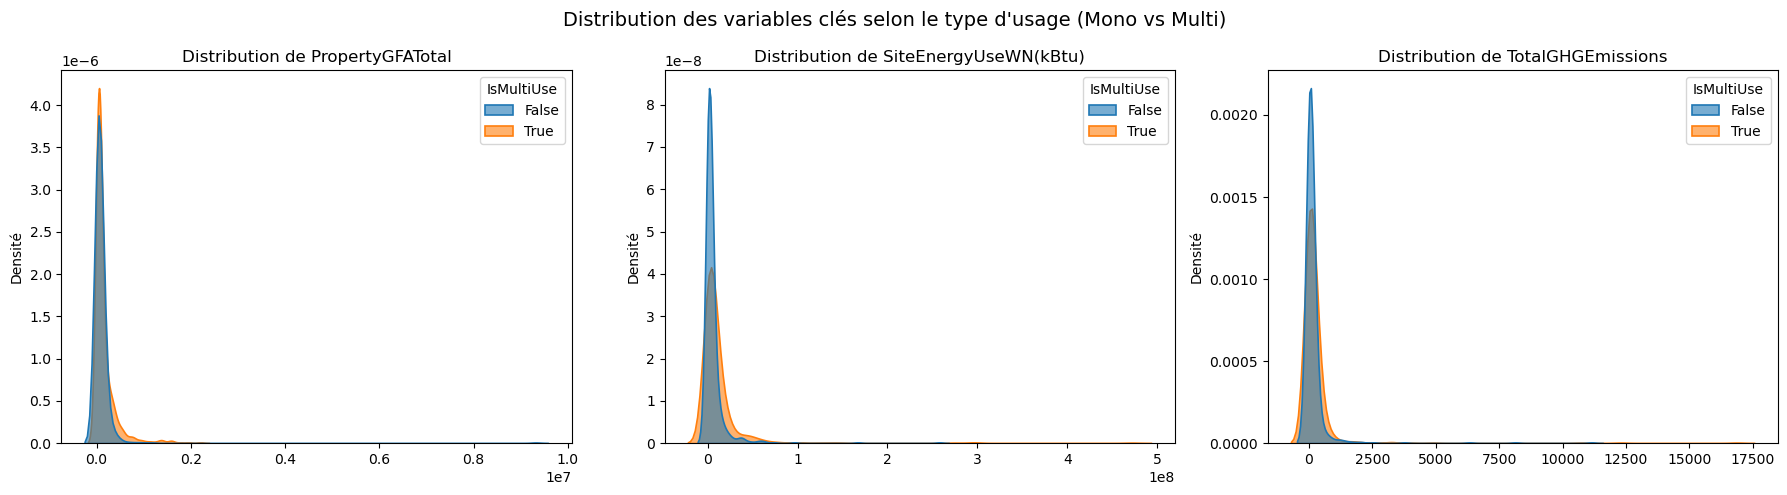

In [3313]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.kdeplot(
        data=building_consumption,
        x=col,
        hue='IsMultiUse',
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densité')

plt.suptitle("Distribution des variables clés selon le type d'usage (Mono vs Multi)", fontsize=14)
plt.tight_layout()
plt.show()


1 / 
Les bâtiments multi-usages sont globalement plus grands que les bâtiments mono-usage.
Cela est logique : combiner plusieurs fonctions (bureaux, parking, commerces…) nécessite davantage d’espace.

2 / 
Les bâtiments multi-usages consomment davantage d’énergie.
Cela s’explique par :
leur plus grande taille,
la diversité des activités hébergées (chauffage, éclairage, froid, informatique, etc.),et une occupation plus continue (plus d’heures d’activité cumulées).

3 / 
Les bâtiments multi-usages sont également plus émetteurs de CO2, ce qui est cohérent avec leur niveau de consommation énergétique.
On retrouve ici le même schéma que pour la variable précédente : taille + diversité = plus d’énergie consommée et donc plus d’émissions.

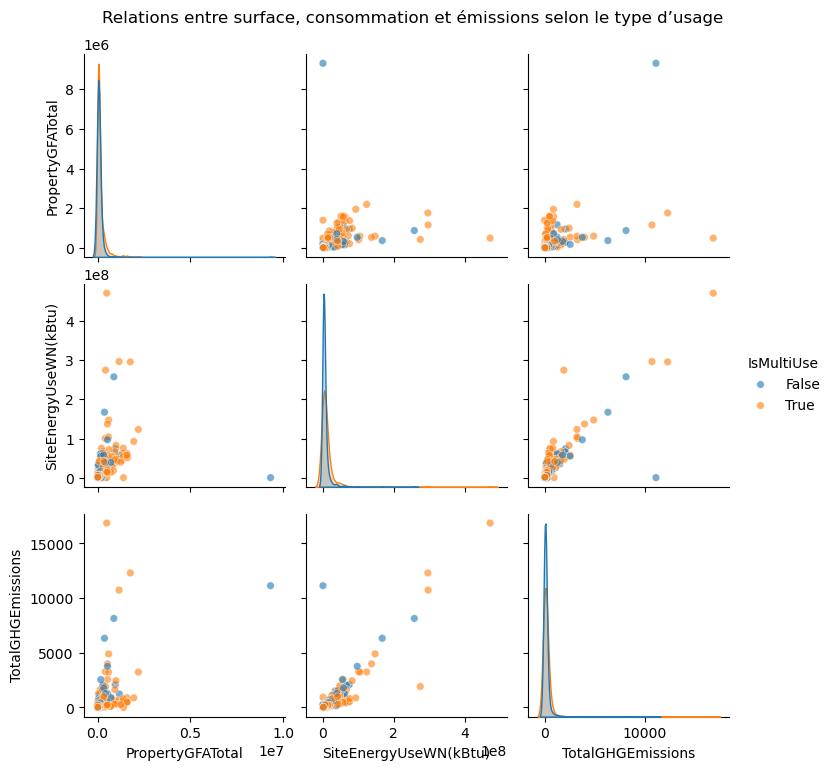

In [3314]:
# On complète avec une pairplot pour visualiser les relations entre les trois variables quantitatives en fonction du type d’usage
sns.pairplot(
    building_consumption,
    vars=['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
    hue='IsMultiUse',
    plot_kws={'alpha':0.6, 's':30}
)
plt.suptitle("Relations entre surface, consommation et émissions selon le type d’usage", y=1.02)
plt.show()


Ce pairplot met en évidence une forte cohérence structurelle entre les variables étudiées :

Les bâtiments les plus vastes sont aussi les plus consommateurs et les plus émetteurs.

Les bâtiments multi-usages (en orange) se distinguent globalement par des valeurs plus élevées sur ces trois axes.

Quelques points isolés traduisent des situations extrêmes mais plausibles (par exemple, hôpitaux ou data centers).

Ces observations confirment que :

la surface totale (PropertyGFATotal) est un prédicteur essentiel,

la variable IsMultiUse est pertinente pour différencier les profils énergétiques,

et les valeurs extrêmes devront être vérifiées mais probablement conservées, car elles traduisent des cas réels importants pour la politique énergétique de la ville.

# Modélisation 

### Import des modules 

In [3315]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [3316]:

# 1. Âge du bâtiment
building_consumption['BuildingAge'] = building_consumption['YearBuilt'].apply(lambda x: 2016 - x)

# 1bis. Classe d'âge du bâtiment
# <20 ans, 20-50 ans, >50 ans
def age_class(age):
    if age <= 20:
        return 'recent'
    elif age <= 50:
        return 'middle'
    else:
        return 'old'
building_consumption['BuildingAgeClass'] = building_consumption['BuildingAge'].apply(age_class)

# 2. Présence de parking
building_consumption['HasParking'] = building_consumption['PropertyGFAParking'].apply(lambda x: 1 if x > 0 else 0)

# 2bis. Part du parking dans le bâtiment
building_consumption['ParkingRatio'] = building_consumption.apply(
    lambda row: row['PropertyGFAParking'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else 0,
    axis=1
)

# 3. Taille du bâtiment
median_area = building_consumption['PropertyGFATotal'].median()
building_consumption['IsLargeBuilding'] = building_consumption['PropertyGFATotal'].apply(
    lambda x: 1 if x > median_area else 0
)

# 3bis. Surface moyenne par étage
building_consumption['AvgFloorArea'] = building_consumption.apply(
    lambda row: row['PropertyGFATotal'] / row['NumberofFloors']
    if row['NumberofFloors'] > 0 else np.nan,
    axis=1
)

# 3ter. Volume approximatif du bâtiment
building_consumption['ApproxBuildingVolume'] = (
    building_consumption['PropertyGFATotal'] * building_consumption['NumberofFloors']
)

# 4. Complexité d'usage (combien d'usages déclarés dans le bâtiment)
building_consumption['UseTypeCount'] = building_consumption['ListOfAllPropertyUseTypes'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
)

# 4bis. Bâtiment à usage multiple (1 si plusieurs usages)
building_consumption['IsMultiUse'] = building_consumption['UseTypeCount'].apply(lambda n: 1 if n > 1 else 0)

# 6. Ratio Gaz / Énergie totale
building_consumption['GasShare'] = building_consumption.apply(
    lambda row: row['NaturalGas(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 7. Ratio Électricité / Énergie totale
building_consumption['ElectricShare'] = building_consumption.apply(
    lambda row: row['Electricity(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 8. Efficacité énergétique déclarée (plus c'est élevé, plus le bâtiment est "mauvais")
building_consumption['InefficiencyScore'] = building_consumption['ENERGYSTARScore'].apply(
    lambda x: 100 - x if pd.notnull(x) else np.nan
)

# 9. Bâtiment ancien (catégorie binaire)
building_consumption['IsOldBuilding'] = building_consumption['BuildingAge'].apply(
    lambda x: 1 if x > 50 else 0
)

# 10. Distance au centre-ville de Seattle
CENTER_LAT, CENTER_LON = 47.6062, -122.3321

def haversine_distance(lat, lon, ref_lat=CENTER_LAT, ref_lon=CENTER_LON):
    R = 6371  # km
    dlat = np.radians(lat - ref_lat)
    dlon = np.radians(lon - ref_lon)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(ref_lat))
        * np.cos(np.radians(lat))
        * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

building_consumption['DistanceFromCenter_km'] = building_consumption.apply(
    lambda row: haversine_distance(row['Latitude'], row['Longitude']),
    axis=1
)

# Nettoyage final des infinis / NaN créés par les divisions
building_consumption.replace([np.inf, -np.inf], np.nan, inplace=True)

# Aperçu final
building_consumption.head()


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,ParkingRatio,IsLargeBuilding,AvgFloorArea,ApproxBuildingVolume,UseTypeCount,GasShare,ElectricShare,InefficiencyScore,IsOldBuilding,DistanceFromCenter_km
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,0.000000,1,7369.500000,1061208,1,0.171177,0.529177,40.0,1,0.800050
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.145453,1,9415.090909,1139226,3,0.593813,0.374270,39.0,0,0.787077
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,0.205748,1,23319.756098,39200510,1,0.020204,0.669849,57.0,0,0.970109
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,0.000000,1,6132.000000,613200,1,0.260726,0.398590,44.0,1,0.944139
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.353115,1,9754.444444,3160440,3,0.600689,0.366295,25.0,0,1.048092


Feature Engineering

De nouvelles variables ont été créées afin d’enrichir le jeu de données et de mieux capter les caractéristiques structurelles et énergétiques des bâtiments :

BuildingAge : âge du bâtiment (2016 – année de construction).

IsOldBuilding : indicateur binaire identifiant les bâtiments de plus de 50 ans.

HasParking : détection des bâtiments disposant d’un espace de stationnement.

IsLargeBuilding : identifie les bâtiments dont la surface dépasse la médiane du jeu de données.

IsMultiUse et UseTypeCount : caractérisent la complexité d’usage du bâtiment.

EnergyIntensity : consommation d’énergie par unité de surface (kBtu/ft²).

EmissionsIntensity : émissions de GES par unité de surface.

Ces features permettront au modèle de mieux relier les caractéristiques physiques, structurelles et fonctionnelles des bâtiments à leurs niveaux de consommation énergétique et d’émissions de CO₂.

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

## 1 / Supprimer toutes les colonnes peu pertinentes pour la modélisation

In [3317]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'OSEBuildingID',                    # Identifiant unique (aucune valeur prédictive)
    'PropertyName',                     # Nom du bâtiment (texte non exploitable)
    'Address',                          # Adresse (texte, unique pour chaque ligne)
    'ZipCode',                          # Code postal : trop granulaire, peu informatif sans encodage spatial
    'TaxParcelIdentificationNumber',    # Identifiant administratif (aucun lien avec la consommation)
    'CouncilDistrictCode',              # Code politique, non pertinent pour la consommation énergétique
    'Neighborhood',                     # Nom de quartier (texte, trop de catégories)
    'DefaultData',                      # Donnée interne au dataset (booléen sans signification métier)
    'ComplianceStatus',                 # Statut administratif (non explicatif)
    'PropertyGFABuilding(s)',           # Redondant avec PropertyGFATotal
    'ListOfAllPropertyUseTypes',        # Déjà résumé par IsMultiUse et UseTypeCount
    'LargestPropertyUseType',           # Texte, redondant avec PrimaryPropertyType
    'SecondLargestPropertyUseType',     # Peu renseigné + redondant
    'SecondLargestPropertyUseTypeGFA'   # Corrélé à LargestPropertyUseTypeGFA et PropertyGFATotal
]

building_consumption = building_consumption.drop(columns=cols_to_drop)
print('Nombre de colonnes après suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 53
Nombre de colonnes après suppression : 39


## 2 / Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.

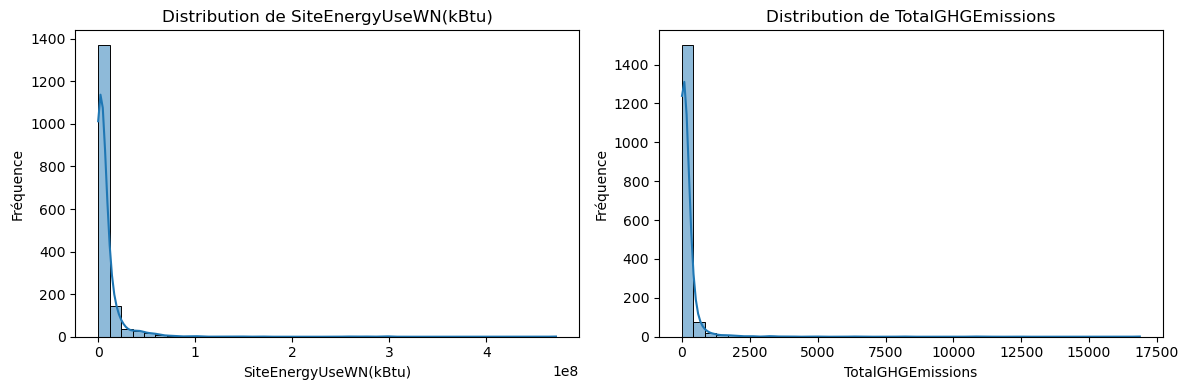

In [3318]:
# Analyse des distributions des variables cibles
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

plt.figure(figsize=(12, 4))

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    sns.histplot(building_consumption[target], kde=True, bins=40)
    plt.title(f"Distribution de {target}")
    plt.xlabel(target)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

Pour SiteEnergyUseWN(kBtu) :

Distribution fortement asymétrique à droite.

Quelques bâtiments consomment énormément d’énergie (probablement des hôpitaux, campus, data centers).

Ces valeurs extrêmes ne sont pas forcément fausses, mais elles biaisent les modèles linéaires.

Pour TotalGHGEmissions :

Même schéma : grande majorité avec faibles émissions, quelques bâtiments très polluants.

Corrélée à la consommation, donc même logique.

In [3319]:
# Suppression des outliers basés sur les quantiles 1% et 99%
print('Nombre de lignes avant suppression des outliers :', building_consumption.shape[0])
for target in targets:
    q_low = building_consumption[target].quantile(0.01)
    q_high = building_consumption[target].quantile(0.99)
    building_consumption = building_consumption[
        (building_consumption[target] > q_low) & 
        (building_consumption[target] < q_high)
    ] 
    print(f"Après suppression des outliers pour {target} : {building_consumption.shape[0]} lignes restantes")

Nombre de lignes avant suppression des outliers : 1629
Après suppression des outliers pour SiteEnergyUseWN(kBtu) : 1584 lignes restantes
Après suppression des outliers pour TotalGHGEmissions : 1552 lignes restantes


## 3 / Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 

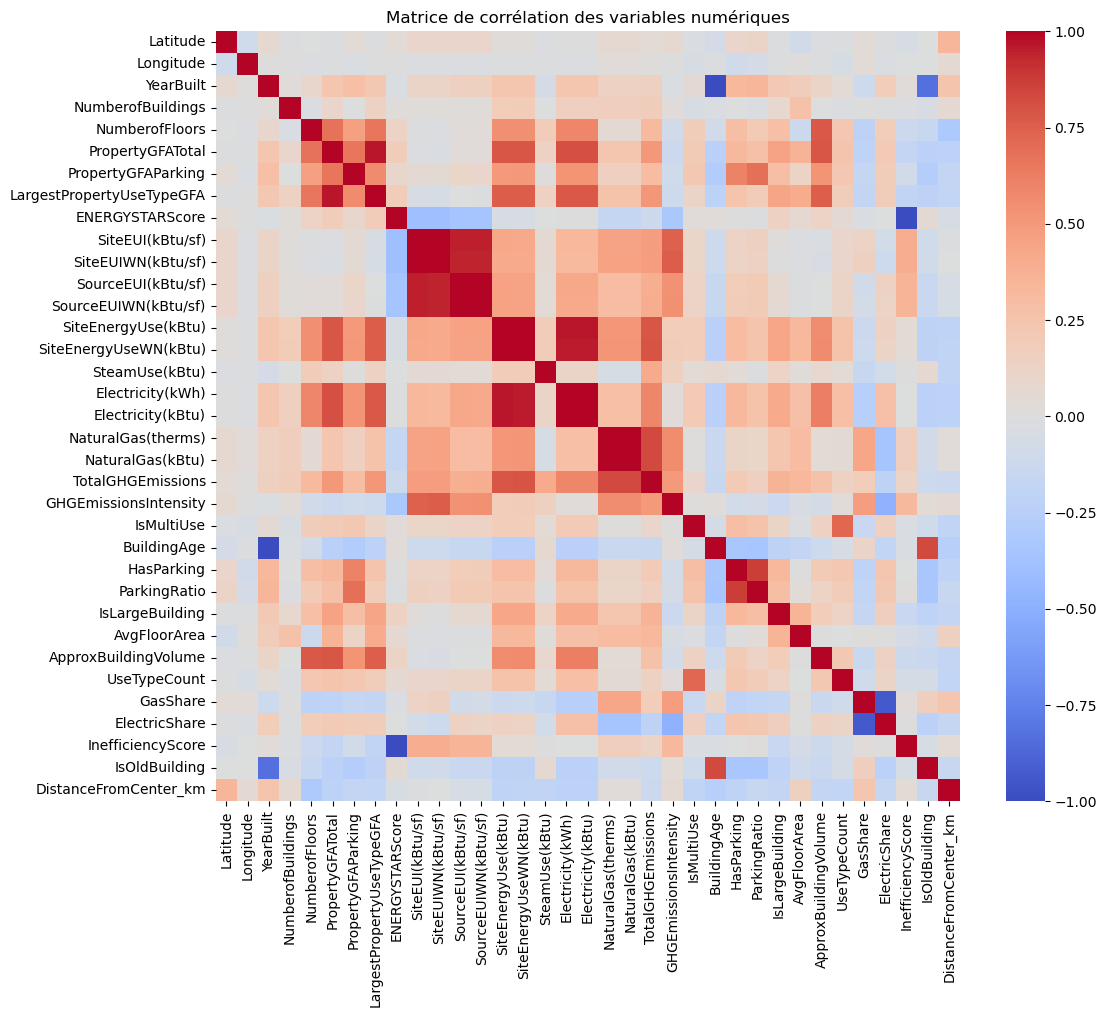

In [3320]:
corr = building_consumption.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [3321]:
print('Nombre de colonnes avant suppression des corrélations :', building_consumption.shape[1])
corr = building_consumption.corr(numeric_only=True)

threshold = 0.5

corr_target1 = corr["SiteEnergyUse(kBtu)"].abs()
corr_target2 = corr["TotalGHGEmissions"].abs()

high_corr_cols = corr_target1[corr_target1 >= threshold].index.union(
    corr_target2[corr_target2 > threshold].index
)

high_corr_cols = [col for col in high_corr_cols if col not in ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]]

print("Colonnes à supprimer car trop corrélées :", high_corr_cols)

building_consumption_with_no_corr = building_consumption.drop(columns=high_corr_cols)
print('Nombre de colonnes après suppression des corrélations :', building_consumption_with_no_corr.shape[1])

Nombre de colonnes avant suppression des corrélations : 39
Colonnes à supprimer car trop corrélées : ['ApproxBuildingVolume', 'Electricity(kBtu)', 'Electricity(kWh)', 'LargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'NaturalGas(therms)', 'NumberofFloors', 'PropertyGFATotal', 'SiteEnergyUseWN(kBtu)']
Nombre de colonnes après suppression des corrélations : 30


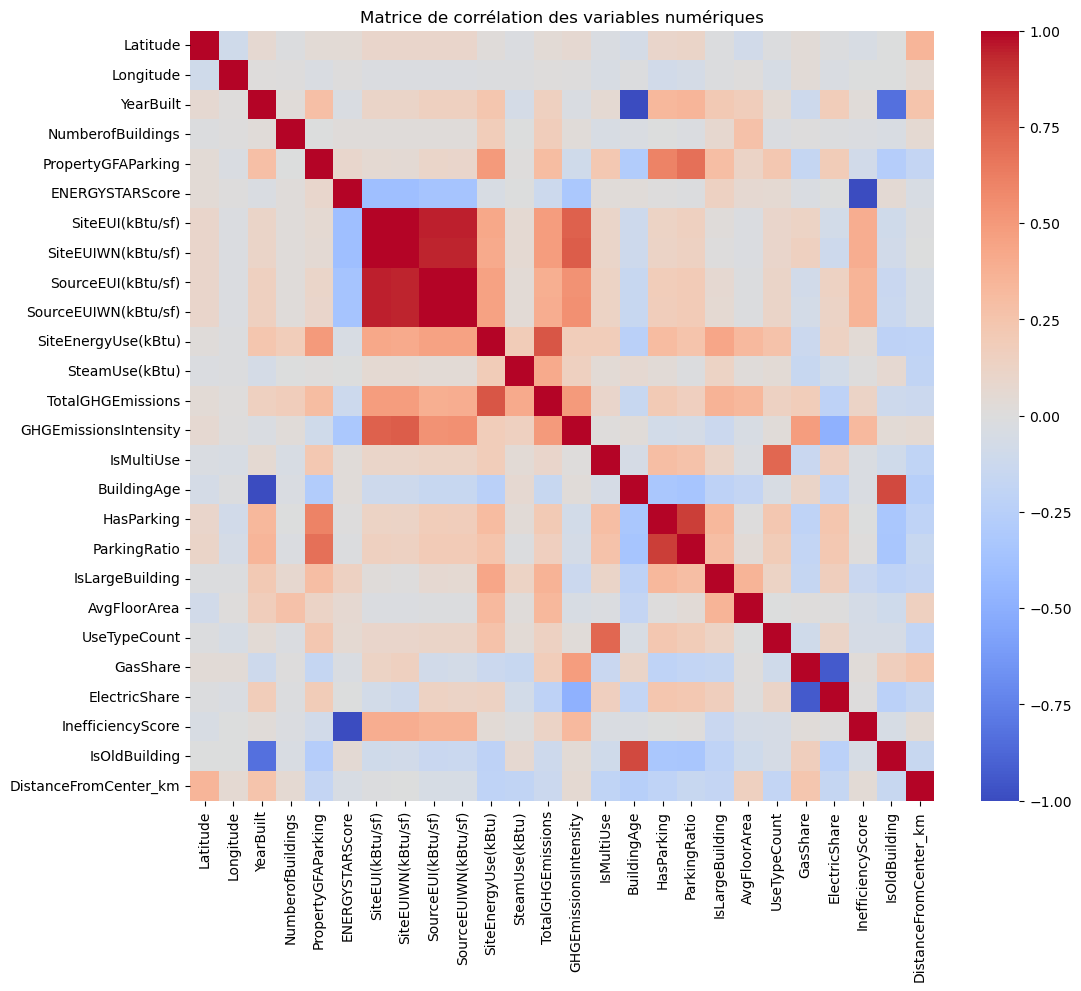

In [3322]:
corr = building_consumption_with_no_corr.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

## 4 / Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).

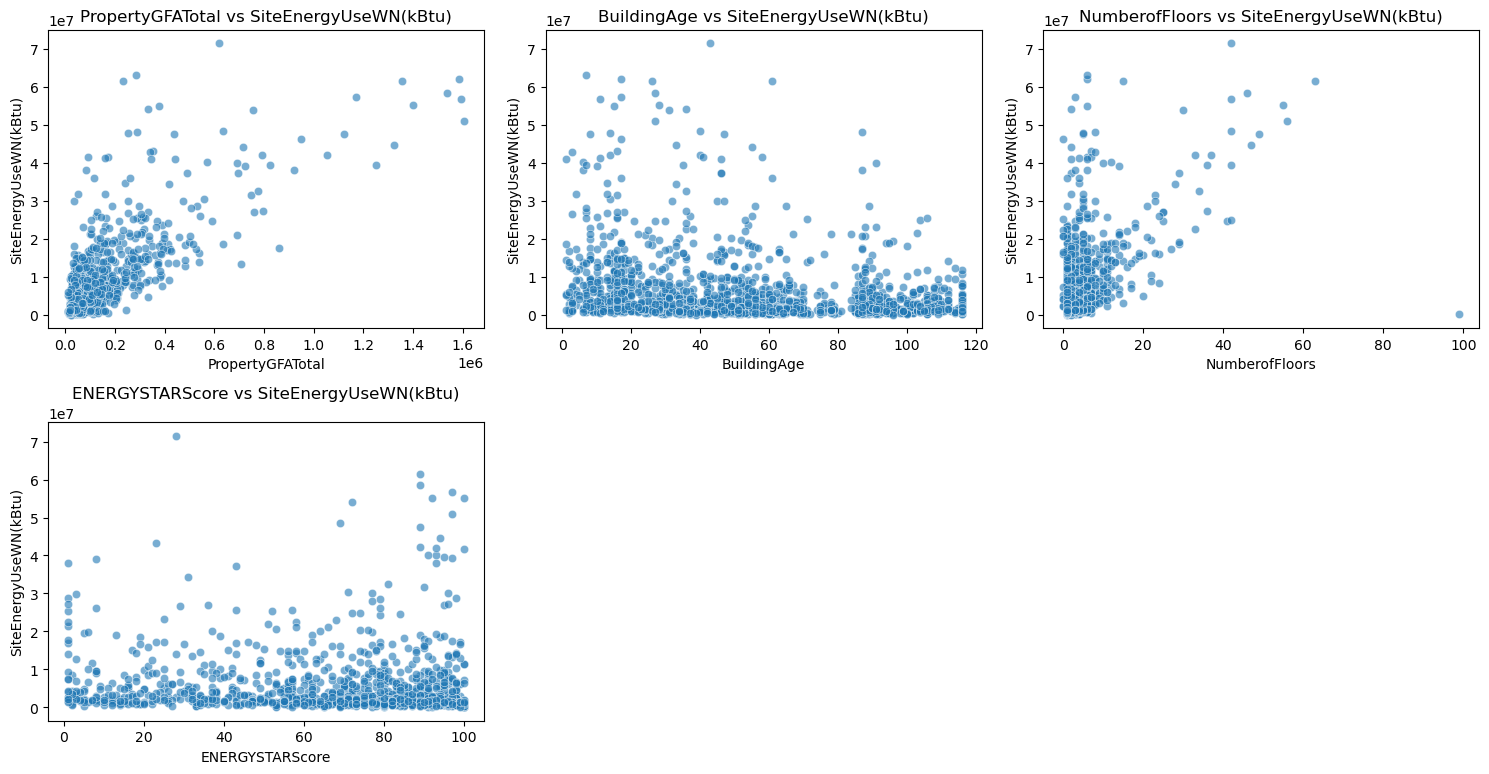

In [3323]:
features_cont = ['PropertyGFATotal', 'BuildingAge', 'NumberofFloors', 'ENERGYSTARScore']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        alpha=0.6
    )
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()

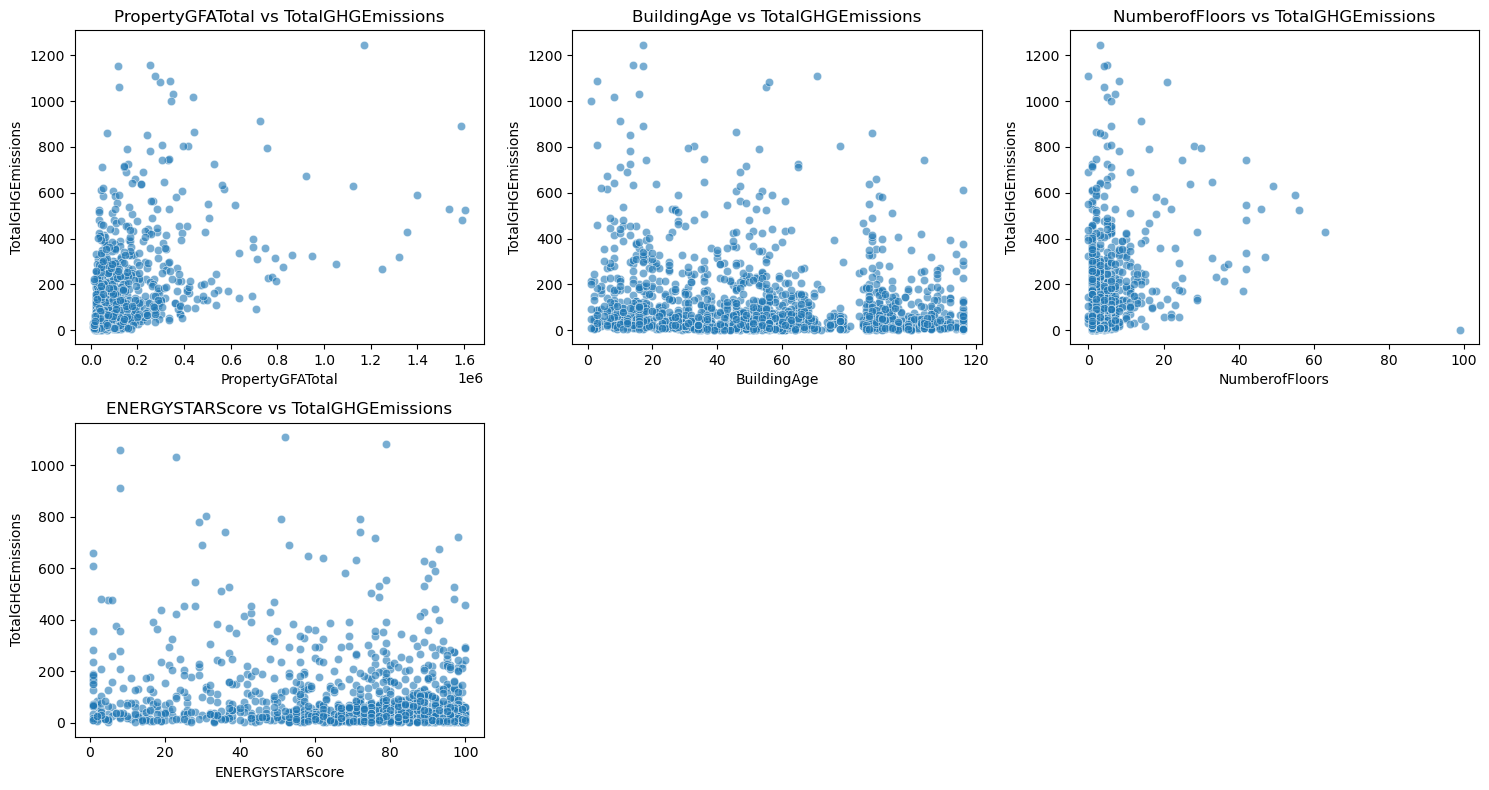

In [3324]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        alpha=0.6
    )
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()

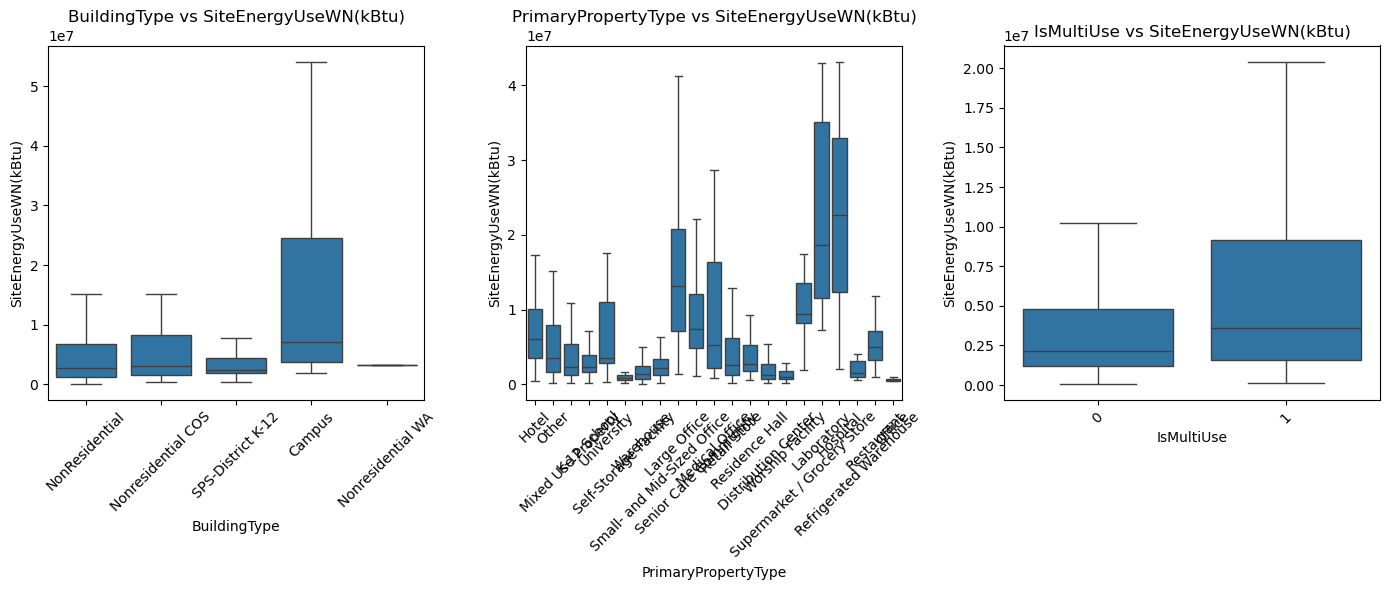

In [3325]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()


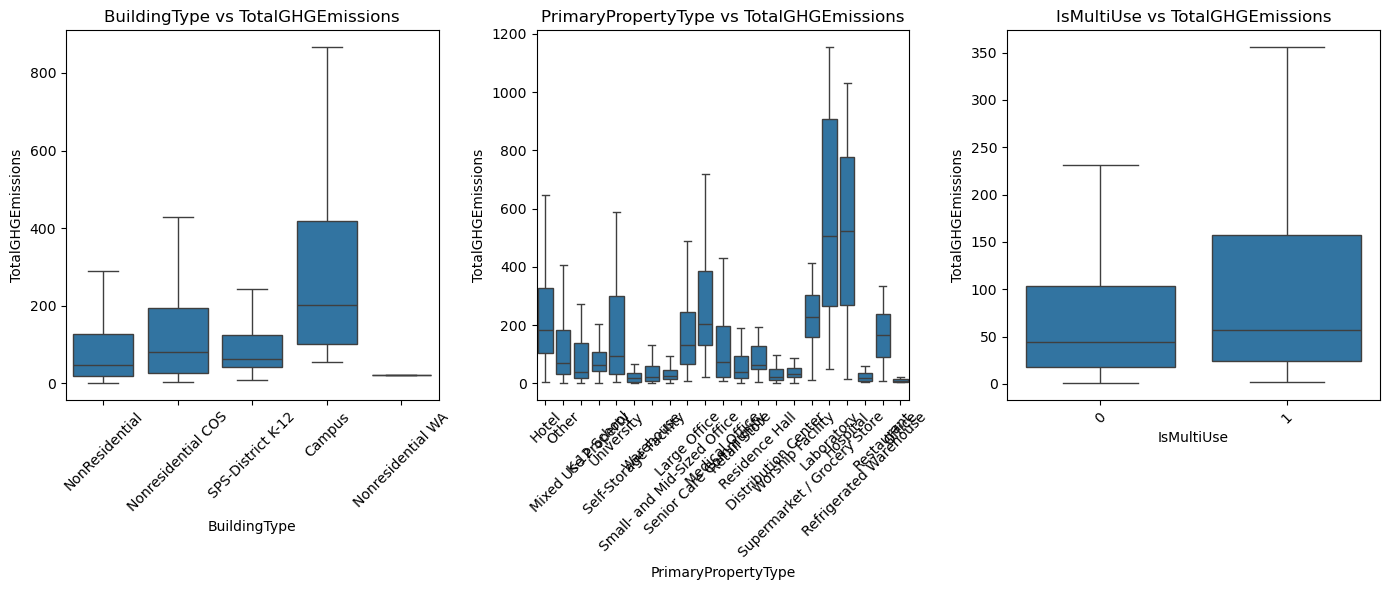

In [3326]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()


Analyse des relations entre les variables et les cibles

Des visualisations de type scatterplot (pour les variables continues) et boxplot (pour les variables catégorielles) ont permis d’analyser les liens entre les caractéristiques des bâtiments et les deux cibles :

la consommation énergétique totale (SiteEnergyUseWN(kBtu)),

et les émissions de gaz à effet de serre (TotalGHGEmissions).

Principales tendances observées :

La surface totale (PropertyGFATotal) est fortement corrélée à la consommation et aux émissions.

L’âge du bâtiment (BuildingAge) montre une légère tendance croissante, les bâtiments anciens étant globalement moins efficaces.

Le score énergétique (ENERGYSTARScore) est corrélé négativement aux deux cibles, validant sa pertinence comme indicateur d’efficacité.

Les bâtiments de type “Campus” ou “Hôpital” consomment et émettent beaucoup plus que la moyenne.

Les bâtiments à usage multiple (IsMultiUse=1) présentent également des consommations plus élevées.

## 5 & 6 / Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). & Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [3327]:
X = building_consumption_with_no_corr.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"])
y_site_energy_use = building_consumption_with_no_corr["SiteEnergyUse(kBtu)"]
y_total_ghg_emissions = building_consumption_with_no_corr["TotalGHGEmissions"]


num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print('Total des colonnes', len(building_consumption_with_no_corr.columns))
print("Numériques :",len(num_cols), list(num_cols))
print("Catégorielles :", len(cat_cols),list(cat_cols))

Total des colonnes 30
Numériques : 24 ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'GHGEmissionsIntensity', 'IsMultiUse', 'BuildingAge', 'HasParking', 'ParkingRatio', 'IsLargeBuilding', 'AvgFloorArea', 'UseTypeCount', 'GasShare', 'ElectricShare', 'InefficiencyScore', 'IsOldBuilding', 'DistanceFromCenter_km']
Catégorielles : 4 ['BuildingType', 'PrimaryPropertyType', 'Outlier', 'BuildingAgeClass']


In [3328]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [3329]:
X_train, X_test, y_train_site_energy_use, y_test_site_energy_use, y_train_total_ghg_emissions, y_test_total_ghg_emissions = train_test_split(
    X,
    y_site_energy_use,
    y_total_ghg_emissions,
    test_size=0.2,
    random_state=42
)


In [3330]:
def train_and_evaluate_single_model(regressor, y_train, y_test, target_name="Target"):
    # ---------- Création et entraînement du pipeline ----------
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ---------- Calcul des métriques ----------
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # ---------- Résumé des résultats ----------
    results = pd.DataFrame({
        "Modèle": [type(regressor).__name__],
        "Cible": [target_name],
        "R²": [r2],
        "MAE": [mae],
        "RMSE": [rmse]
    })

    print(f"=== Résultats pour {target_name} ===")
    display(results)

    return {
        "model": model,
        "y_pred": y_pred,
        "results": results
    }


In [3331]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# ========= SITE ENERGY USE (y_first) =========

site_energy_use_random_forest_regressor = train_and_evaluate_single_model(
    regressor=RandomForestRegressor(random_state=42),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_linear_regression = train_and_evaluate_single_model(
    regressor=LinearRegression(fit_intercept=True, n_jobs=-1, positive=True),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_ridge_regression = train_and_evaluate_single_model(
    regressor=Ridge(alpha=1.0),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_lasso_regression = train_and_evaluate_single_model(
    regressor=Lasso(alpha=0.001),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_elasticnet_regression = train_and_evaluate_single_model(
    regressor=ElasticNet(alpha=0.001, l1_ratio=0.5),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_gradient_boosting_regressor = train_and_evaluate_single_model(
    regressor=GradientBoostingRegressor(random_state=42),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_hist_gb_regressor = train_and_evaluate_single_model(
    regressor=HistGradientBoostingRegressor(random_state=42),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_svr = train_and_evaluate_single_model(
    regressor=SVR(),  # peut être un peu lent si beaucoup de données
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_knn = train_and_evaluate_single_model(
    regressor=KNeighborsRegressor(n_neighbors=5),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_lightgbm_regressor = train_and_evaluate_single_model(
    regressor=LGBMRegressor(random_state=42),
    y_train=y_train_site_energy_use,
    y_test=y_test_site_energy_use,
    target_name="SiteEnergyUse(kBtu)"
)

site_energy_use_results = pd.concat([
    site_energy_use_random_forest_regressor["results"],
    site_energy_use_linear_regression["results"],
    site_energy_use_ridge_regression["results"],
    site_energy_use_lasso_regression["results"],
    site_energy_use_elasticnet_regression["results"],
    site_energy_use_gradient_boosting_regressor["results"],
    site_energy_use_hist_gb_regressor["results"],
    site_energy_use_svr["results"],
    site_energy_use_knn["results"],
    site_energy_use_lightgbm_regressor["results"]
], ignore_index=True)



=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,RandomForestRegressor,SiteEnergyUse(kBtu),0.75113,2.277979e+06,5.123929e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,LinearRegression,SiteEnergyUse(kBtu),0.638296,3.120491e+06,6.177234e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,Ridge,SiteEnergyUse(kBtu),0.748227,2.887434e+06,5.153736e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+16, tolerance: 9.019e+12
  model = cd_fast.enet_coordinate_descent(


,Modèle,Cible,R²,MAE,RMSE
0,Lasso,SiteEnergyUse(kBtu),0.747106,2.892700e+06,5.165190e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+16, tolerance: 9.019e+12
  model = cd_fast.enet_coordinate_descent(


,Modèle,Cible,R²,MAE,RMSE
0,ElasticNet,SiteEnergyUse(kBtu),0.747929,2.889042e+06,5.156778e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,GradientBoostingRegressor,SiteEnergyUse(kBtu),0.841199,2.027927e+06,4.093017e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,HistGradientBoostingRegressor,SiteEnergyUse(kBtu),0.776803,2.334168e+06,4.852449e+06


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,SVR,SiteEnergyUse(kBtu),-0.132468,4.964369e+06,1.093025e+07


=== Résultats pour SiteEnergyUse(kBtu) ===


,Modèle,Cible,R²,MAE,RMSE
0,KNeighborsRegressor,SiteEnergyUse(kBtu),0.67806,2.536301e+06,5.827796e+06


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3469
[LightGBM] [Info] Number of data points in the train set: 1241, number of used features: 42
[LightGBM] [Info] Start training from score 5854187.447434
=== Résultats pour SiteEnergyUse(kBtu) ===
=== Résultats pour SiteEnergyUse(kBtu) ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Modèle,Cible,R²,MAE,RMSE
0,LGBMRegressor,SiteEnergyUse(kBtu),0.781735,2.228676e+06,4.798539e+06


In [3332]:
# ========= TOTAL GHG EMISSIONS (y_second) =========

total_ghg_random_forest_regressor = train_and_evaluate_single_model(
    regressor=RandomForestRegressor(random_state=42),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_linear_regression = train_and_evaluate_single_model(
    regressor=LinearRegression(fit_intercept=True, n_jobs=-1, positive=True),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_ridge_regression = train_and_evaluate_single_model(
    regressor=Ridge(alpha=1.0),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_lasso_regression = train_and_evaluate_single_model(
    regressor=Lasso(alpha=0.001),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_elasticnet_regression = train_and_evaluate_single_model(
    regressor=ElasticNet(alpha=0.001, l1_ratio=0.5),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_gradient_boosting_regressor = train_and_evaluate_single_model(
    regressor=GradientBoostingRegressor(random_state=42),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_hist_gb_regressor = train_and_evaluate_single_model(
    regressor=HistGradientBoostingRegressor(random_state=42),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_svr = train_and_evaluate_single_model(
    regressor=SVR(),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_knn = train_and_evaluate_single_model(
    regressor=KNeighborsRegressor(n_neighbors=5),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_lightgbm_regressor = train_and_evaluate_single_model(
    regressor=LGBMRegressor(random_state=42),
    y_train=y_train_total_ghg_emissions,
    y_test=y_test_total_ghg_emissions,
    target_name="TotalGHGEmissions"
)

total_ghg_results = pd.concat([
    total_ghg_random_forest_regressor["results"],
    total_ghg_linear_regression["results"],
    total_ghg_ridge_regression["results"],
    total_ghg_lasso_regression["results"],
    total_ghg_elasticnet_regression["results"],
    total_ghg_gradient_boosting_regressor["results"],
    total_ghg_hist_gb_regressor["results"],
    total_ghg_svr["results"],
    total_ghg_knn["results"],
    total_ghg_lightgbm_regressor["results"]
], ignore_index=True)



=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,RandomForestRegressor,TotalGHGEmissions,0.824678,33.099149,66.534452


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,LinearRegression,TotalGHGEmissions,0.627926,59.416785,96.926578


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,Ridge,TotalGHGEmissions,0.677786,56.232057,90.198758


=== Résultats pour TotalGHGEmissions ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.711e+06, tolerance: 3.505e+03
  model = cd_fast.enet_coordinate_descent(


,Modèle,Cible,R²,MAE,RMSE
0,Lasso,TotalGHGEmissions,0.674682,56.347566,90.632271


=== Résultats pour TotalGHGEmissions ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.642e+06, tolerance: 3.505e+03
  model = cd_fast.enet_coordinate_descent(


,Modèle,Cible,R²,MAE,RMSE
0,ElasticNet,TotalGHGEmissions,0.677166,56.257731,90.285472


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,GradientBoostingRegressor,TotalGHGEmissions,0.823145,34.136131,66.824814


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,HistGradientBoostingRegressor,TotalGHGEmissions,0.805722,35.725357,70.039064


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,SVR,TotalGHGEmissions,0.072611,68.387433,153.024008


=== Résultats pour TotalGHGEmissions ===


,Modèle,Cible,R²,MAE,RMSE
0,KNeighborsRegressor,TotalGHGEmissions,0.756521,40.177305,78.407732


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3469
[LightGBM] [Info] Number of data points in the train set: 1241, number of used features: 42
[LightGBM] [Info] Start training from score 115.914456
=== Résultats pour TotalGHGEmissions ===
=== Résultats pour TotalGHGEmissions ===


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Modèle,Cible,R²,MAE,RMSE
0,LGBMRegressor,TotalGHGEmissions,0.802342,35.570321,70.645662


In [ ]:
# Liste des modèles entraînés sur SiteEnergyUse(kBtu)
total_site_energy_models = [
    site_energy_use_random_forest_regressor,
    site_energy_use_linear_regression,
    site_energy_use_ridge_regression,
    site_energy_use_lasso_regression,
    site_energy_use_elasticnet_regression,
    site_energy_use_gradient_boosting_regressor,
    site_energy_use_hist_gb_regressor,
    site_energy_use_svr,
    site_energy_use_knn,
    site_energy_use_lightgbm_regressor
]

model_names = [
    "RandomForest", "LinearRegression", "Ridge", "Lasso", "ElasticNet",
    "GradientBoosting", "HistGradientBoosting", "SVR", "KNN","LightGBM"
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (model_data, name) in enumerate(zip(total_site_energy_models, model_names)):
    y_pred = model_data["y_pred"]

    # scatter : réel vs prédit (pour SiteEnergyUse)
    axes[i].scatter(
        y_test_site_energy_use,
        y_pred,
        alpha=0.5,
        color='royalblue',
        edgecolor='k',
        s=25
    )

    # diagonale "prédiction parfaite"
    axes[i].plot(
        [y_test_site_energy_use.min(), y_test_site_energy_use.max()],
        [y_test_site_energy_use.min(), y_test_site_energy_use.max()],
        'r--',
        linewidth=2
    )

    r2 = r2_score(y_test_site_energy_use, y_pred)

    axes[i].set_title(f"{name}\nR² = {r2:.3f}", fontsize=11)
    axes[i].set_xlabel("Valeurs réelles", fontsize=9)
    axes[i].set_ylabel("Valeurs prédites", fontsize=9)
    axes[i].grid(alpha=0.3, linestyle='--')

# Supprime les axes en trop s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparaison visuelle - SiteEnergyUse(kBtu) (Réel vs Prédit)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


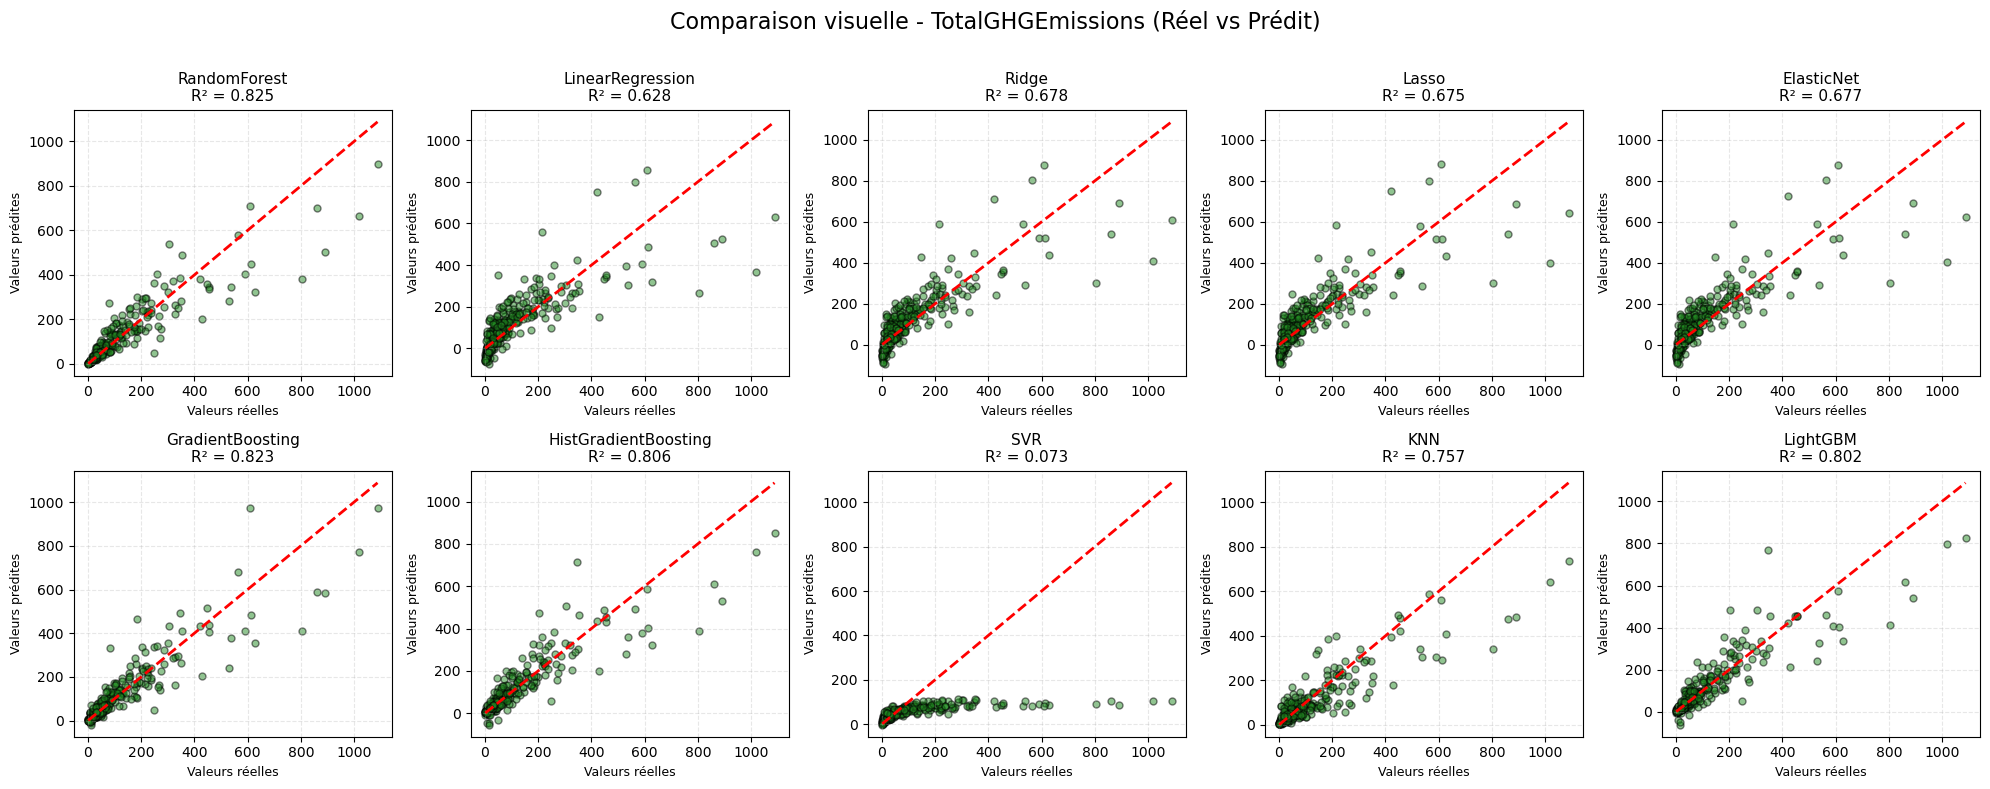

In [ ]:
total_ghg_models = [
    total_ghg_random_forest_regressor,
    total_ghg_linear_regression,
    total_ghg_ridge_regression,
    total_ghg_lasso_regression,
    total_ghg_elasticnet_regression,
    total_ghg_gradient_boosting_regressor,
    total_ghg_hist_gb_regressor,
    total_ghg_svr,
    total_ghg_knn,
    total_ghg_lightgbm_regressor 
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (model_data, name) in enumerate(zip(total_ghg_models, model_names)):
    y_pred = model_data["y_pred"]

    axes[i].scatter(y_test_total_ghg_emissions, y_pred, alpha=0.5, color='forestgreen', edgecolor='k', s=25)
    axes[i].plot(
        [y_test_total_ghg_emissions.min(), y_test_total_ghg_emissions.max()],
        [y_test_total_ghg_emissions.min(), y_test_total_ghg_emissions.max()],
        'r--', linewidth=2
    )

    r2 = r2_score(y_test_total_ghg_emissions, y_pred)

    axes[i].set_title(f"{name}\nR² = {r2:.3f}", fontsize=11)
    axes[i].set_xlabel("Valeurs réelles", fontsize=9)
    axes[i].set_ylabel("Valeurs prédites", fontsize=9)
    axes[i].grid(alpha=0.3, linestyle='--')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparaison visuelle - TotalGHGEmissions (Réel vs Prédit)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Tunning d'hyperparamètres et sélection de features
## Pourquoi ?
Un modèle de base n’est qu’un point de départ. On cherche à optimiser les hyperparamètres (ceux qu’on ne peut pas apprendre directement)
Donc on cherche à trouver le meilleur équilibre entre biais et variance + réduire la dimension pour éviter le sur-apprentissage



In [ ]:
def gridsearch_and_evaluate_model(regressor, param_grid, model_name, y_train, y_test):
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    print(f"\n=== {model_name} ===")
    print("Meilleurs hyperparamètres :", grid_search.best_params_)
    print(f"R² cross-validation moyen : {grid_search.best_score_:.4f}")

    # Évaluation finale sur le jeu de test
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f"R² sur test set : {test_r2:.4f}")

    return best_model, y_pred

param_grid_rf = {
    'regressor__n_estimators': [200, 500, 800],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5],
    'regressor__max_features': ['sqrt', 'log2']
}

param_grid_gb = {
    'regressor__n_estimators': [200, 500, 800],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 8],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3]
}

param_grid_hgb = {
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [5, 10, 20],
    'regressor__max_iter': [200, 500, 800],
    'regressor__l2_regularization': [0.0, 0.1, 1.0],
    'regressor__min_samples_leaf': [20, 50, 100]
}

param_grid_lgbm = {
    'regressor__n_estimators': [200, 500, 800],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__num_leaves': [31, 64, 128],
    'regressor__subsample': [0.7, 0.9],
    'regressor__colsample_bytree': [0.7, 0.9],
    'regressor__min_child_samples': [10, 20, 50]
}



In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


def randomsearch_and_evaluate_model(regressor, param_distributions, model_name, y_train, y_test):
    start_time = time.time()

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=25,          
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    elapsed = time.time() - start_time

    best_model = random_search.best_estimator_

    print(f"\n=== {model_name} ===")
    print("Meilleurs hyperparamètres :", random_search.best_params_)
    print(f"R² cross-validation moyen : {random_search.best_score_:.4f}")
    print(f"Durée d'entraînement : {elapsed/60:.2f} minutes")

    # Évaluation finale
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f"R² sur test set : {test_r2:.4f}")

    return {
        "model_name": model_name,
        "best_model": best_model,
        "best_params": random_search.best_params_,
        "cv_r2": random_search.best_score_,
        "test_r2": test_r2,
        "y_pred": y_pred
    }

param_dist_rf = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__max_depth': randint(5, 30),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__max_features': ['sqrt', 'log2']
}

param_dist_gb = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5)
}

param_dist_hgb = {
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(5, 20),
    'regressor__max_iter': randint(200, 1000),
    'regressor__l2_regularization': uniform(0.0, 1.0),
    'regressor__min_samples_leaf': randint(10, 100)
}

param_dist_lgbm = {
    'regressor__n_estimators': randint(200, 1000),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__num_leaves': randint(31, 200),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__min_child_samples': randint(10, 100)
}




In [ ]:
best_gb_model_site_energy_use = randomsearch_and_evaluate_model(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    "GradientBoosting",
    y_train_site_energy_use,
    y_test_site_energy_use
)

best_rf_ghg_emissions = randomsearch_and_evaluate_model(
    RandomForestRegressor(random_state=42),
    param_dist_rf,                         
    "RandomForest",
    y_train_total_ghg_emissions,                       
    y_test_total_ghg_emissions                         
)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__min_samples_leaf=3, regressor__min_samples_split=5, regressor__n_estimators=500; total time=   1.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__min_samples_leaf=3, regressor__min_samples_split=5, regressor__n_estimators=500; total time=   1.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=500; total time=   1.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=500; total time=   1.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__min_samples_leaf=3, regressor__min_samples_split=5, regressor__n_estimators=500; total time=   1.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, 

# Interprétation & Visualisation
## Pourquoi ?
Un bon modèle ne suffit pas, il faut comprendre pourquoi il prédit
Cela va nous servir à comprendre la contribution de chaque variable sur une prédiction donnée

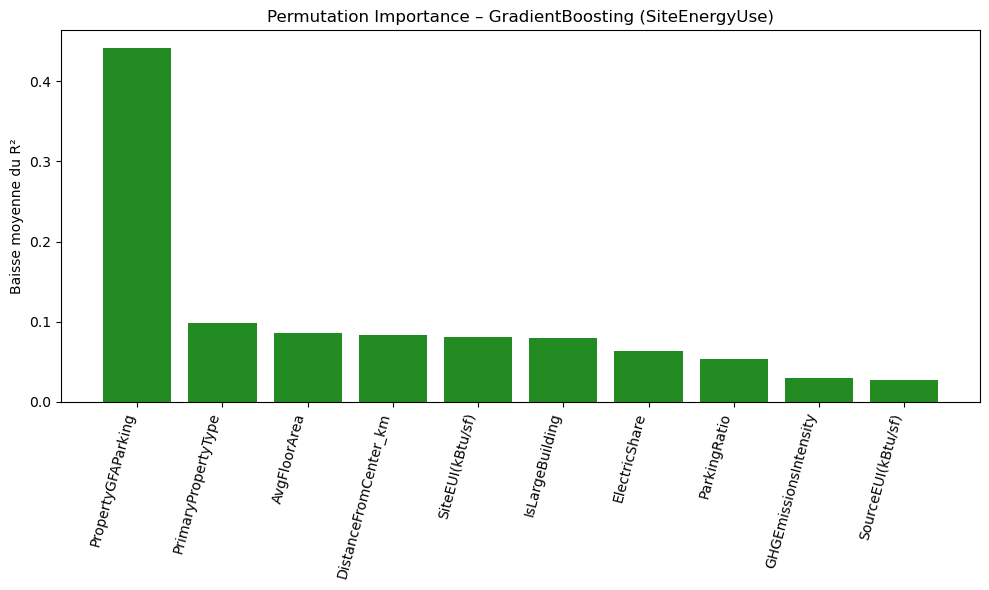

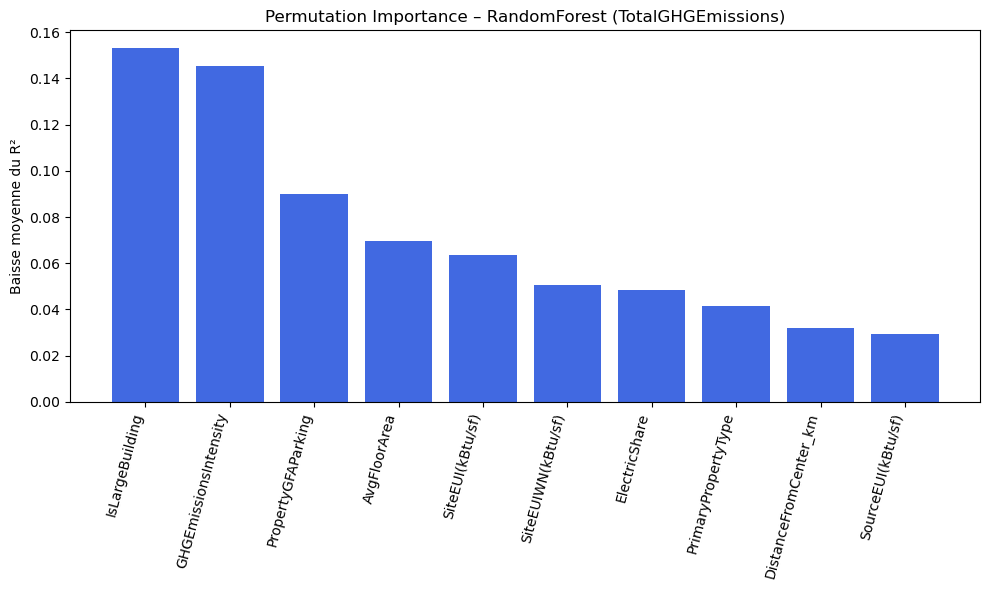

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# GradientBoosting – SiteEnergyUse(kBtu)
# ===============================
result_gb = permutation_importance(
    best_gb_model_site_energy_use["best_model"],
    X_test,
    y_test_site_energy_use,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Trier les features par importance moyenne
sorted_idx_gb = result_gb.importances_mean.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), result_gb.importances_mean[sorted_idx_gb][:10], color='forestgreen')
plt.xticks(range(10), np.array(X_test.columns)[sorted_idx_gb][:10], rotation=75, ha='right')
plt.title("Permutation Importance – GradientBoosting (SiteEnergyUse)")
plt.ylabel("Baisse moyenne du R²")
plt.tight_layout()
plt.show()


# ===============================
# RandomForest – TotalGHGEmissions
# ===============================
result_rf = permutation_importance(
    best_rf_ghg_emissions["best_model"],
    X_test,
    y_test_total_ghg_emissions,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

sorted_idx_rf = result_rf.importances_mean.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), result_rf.importances_mean[sorted_idx_rf][:10], color='royalblue')
plt.xticks(range(10), np.array(X_test.columns)[sorted_idx_rf][:10], rotation=75, ha='right')
plt.title("Permutation Importance – RandomForest (TotalGHGEmissions)")
plt.ylabel("Baisse moyenne du R²")
plt.tight_layout()
plt.show()


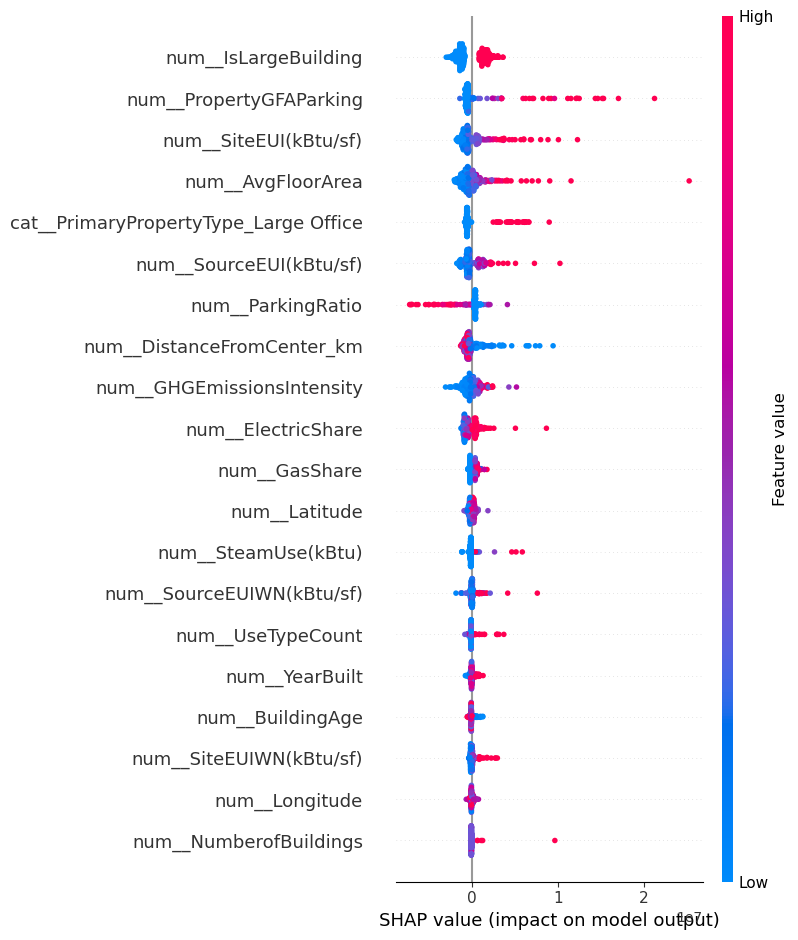

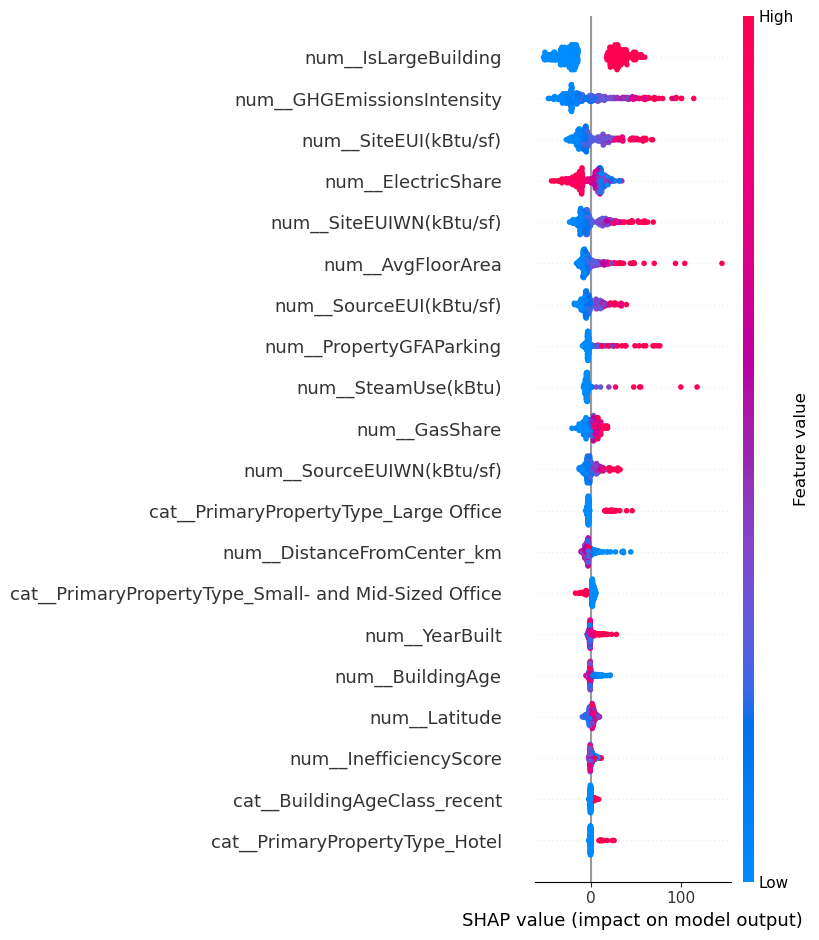

In [ ]:
import shap
import numpy as np

# ----------- GradientBoosting : SiteEnergyUse -----------
gb_pipeline = best_gb_model_site_energy_use["best_model"]
gb_regressor = gb_pipeline.named_steps["regressor"]
gb_preprocessor = gb_pipeline.named_steps["preprocessor"]

X_test_gb_transformed = gb_preprocessor.transform(X_test)

# Récupération des noms de features pour GradientBoosting
try:
    feature_names_gb = gb_preprocessor.get_feature_names_out()
except:
    # Alternative si get_feature_names_out() ne fonctionne pas
    feature_names_gb = [f"feature_{i}" for i in range(X_test_gb_transformed.shape[1])]

explainer_gb = shap.Explainer(gb_regressor)
shap_values_gb = explainer_gb(X_test_gb_transformed)

# Graphique global avec noms des features
shap.summary_plot(shap_values_gb, feature_names=feature_names_gb)


# ----------- RandomForest : TotalGHGEmissions -----------
rf_pipeline = best_rf_ghg_emissions["best_model"]
rf_regressor = rf_pipeline.named_steps["regressor"]
rf_preprocessor = rf_pipeline.named_steps["preprocessor"]

X_test_rf_transformed = rf_preprocessor.transform(X_test)

# Récupération des noms de features pour RandomForest
try:
    feature_names_rf = rf_preprocessor.get_feature_names_out()
except:
    # Alternative si get_feature_names_out() ne fonctionne pas
    feature_names_rf = [f"feature_{i}" for i in range(X_test_rf_transformed.shape[1])]

explainer_rf = shap.Explainer(rf_regressor)
shap_values_rf = explainer_rf(X_test_rf_transformed)

# Graphique avec noms des features
shap.summary_plot(shap_values_rf, feature_names=feature_names_rf)